#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
import spacy
nlp = spacy.load("en_core_web_sm")
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#Loading and analyzing dataset

In [2]:
df = pd.read_csv('train.csv')
df.head(20)

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
5,3,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...
6,3,Money Funds Fell in Latest Week (AP),AP - Assets of the nation's retail money marke...
7,3,Fed minutes show dissent over inflation (USATO...,USATODAY.com - Retail sales bounced back a bit...
8,3,Safety Net (Forbes.com),Forbes.com - After earning a PH.D. in Sociolog...
9,3,Wall St. Bears Claw Back Into the Black,"NEW YORK (Reuters) - Short-sellers, Wall Stre..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [4]:
df['Text'] = df['Title'] + "" + df['Description']
df.head()
df.tail()

,Class Index,Title,Description,Text
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...,Pakistan's Musharraf Says Won't Quit as Army C...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...,Renteria signing a top-shelf dealRed Sox gener...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...,Saban not going to Dolphins yetThe Miami Dolph...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...,Today's NFL gamesPITTSBURGH at NY GIANTS Time:...
119999,2,Nets get Carter from Raptors,INDIANAPOLIS -- All-Star Vince Carter was trad...,Nets get Carter from RaptorsINDIANAPOLIS -- Al...


In [5]:
df['Class Index'].value_counts()

,count
Class Index,
3,30000
4,30000
2,30000
1,30000


balanced training dataset

#Text Preprocessing

In [6]:
STOPWORDS = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()

    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token not in STOPWORDS]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    text = ' '.join(tokens)
    return text

df['Text'] = df['Text'].apply(clean_text)

In [7]:
#same steps for testing data
test = pd.read_csv('test.csv')
test['Text'] = test['Title'] + "" + test['Description']
test['Text'] = test['Text'].apply(clean_text)


#Word Representation with TF-IDF

In [8]:
tfidf = TfidfVectorizer()
training_text = tfidf.fit_transform(df['Text'])
testing_test = tfidf.transform(test['Text'])

#Training & Evaluating

### 📌 Logistic Regression Model

In [9]:
x_train = training_text
y_train = df['Class Index']
x_test = testing_test
y_test = test['Class Index']

clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print(classification_report(y_test, y_pred))


Accuracy: 0.9126
              precision    recall  f1-score   support

           1       0.93      0.90      0.91      1900
           2       0.95      0.98      0.96      1900
           3       0.88      0.88      0.88      1900
           4       0.89      0.89      0.89      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600



###📌 Random Forest Model

In [11]:
rf = RandomForestClassifier(n_estimators=50, max_depth=30, random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print(classification_report(y_test, y_pred))

Accuracy: 0.8426
              precision    recall  f1-score   support

           1       0.86      0.84      0.85      1900
           2       0.85      0.95      0.90      1900
           3       0.84      0.77      0.81      1900
           4       0.81      0.81      0.81      1900

    accuracy                           0.84      7600
   macro avg       0.84      0.84      0.84      7600
weighted avg       0.84      0.84      0.84      7600



### 📌 Linear SVC Model

In [13]:
svc = LinearSVC()
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print(classification_report(y_test, y_pred))

Accuracy: 0.917
              precision    recall  f1-score   support

           1       0.94      0.90      0.92      1900
           2       0.96      0.98      0.97      1900
           3       0.89      0.89      0.89      1900
           4       0.89      0.90      0.89      1900

    accuracy                           0.92      7600
   macro avg       0.92      0.92      0.92      7600
weighted avg       0.92      0.92      0.92      7600



# Bonus ⭐

### visualizing most frequent words

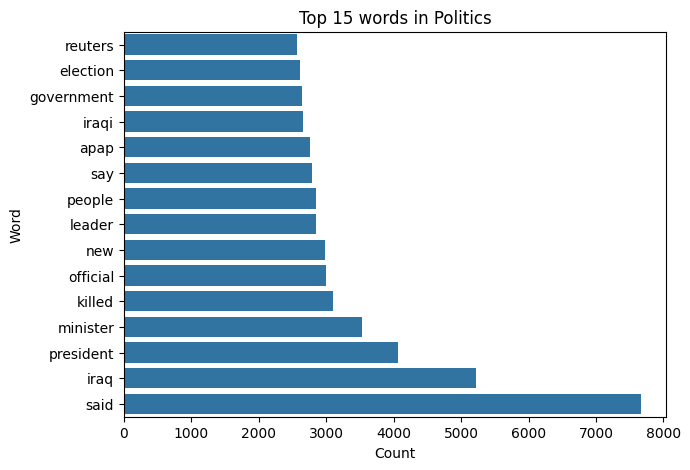

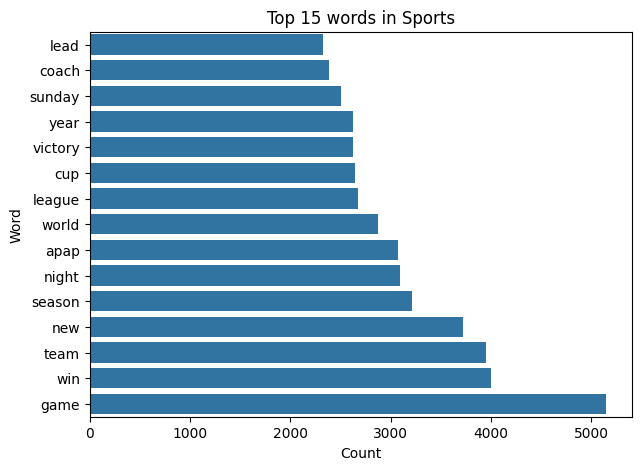

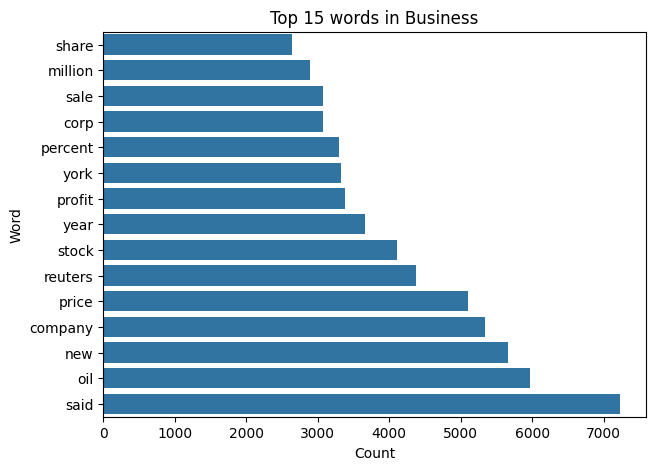

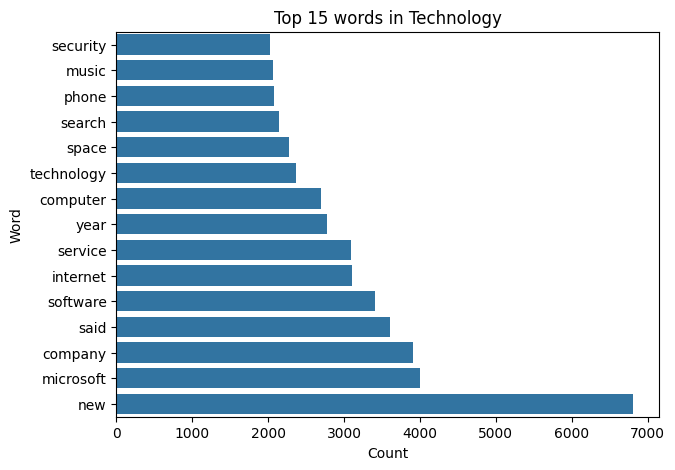

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

label_map = {1: "Politics", 2: "Sports", 3: "Business", 4: "Technology"}

cv = CountVectorizer(stop_words="english", max_features=20000)
X_counts = cv.fit_transform(df["Text"])
features = np.array(cv.get_feature_names_out())

def plot_top_words_per_class(X, y, features, class_id, class_name, n=15):
    mask = (y == class_id)
    counts = np.array(X[mask].sum(axis=0)).ravel()
    top_idx = counts.argsort()[-n:]

    plt.figure(figsize=(7,5))
    sns.barplot(x=counts[top_idx], y=features[top_idx])
    plt.title(f"Top {n} words in {class_name}")
    plt.xlabel("Count")
    plt.ylabel("Word")
    plt.show()

for class_id, class_name in label_map.items():
    plot_top_words_per_class(X_counts, df['Class Index'].values, features, class_id, class_name)


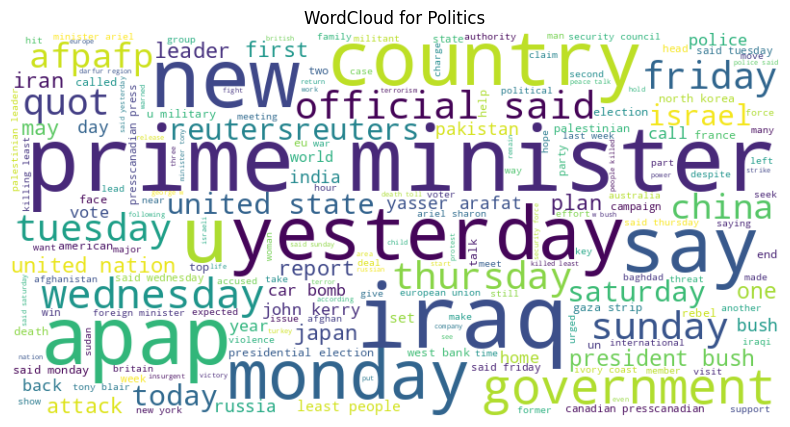

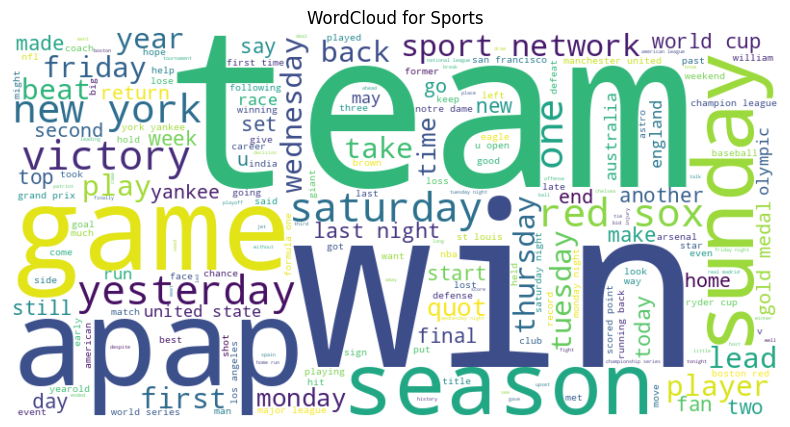

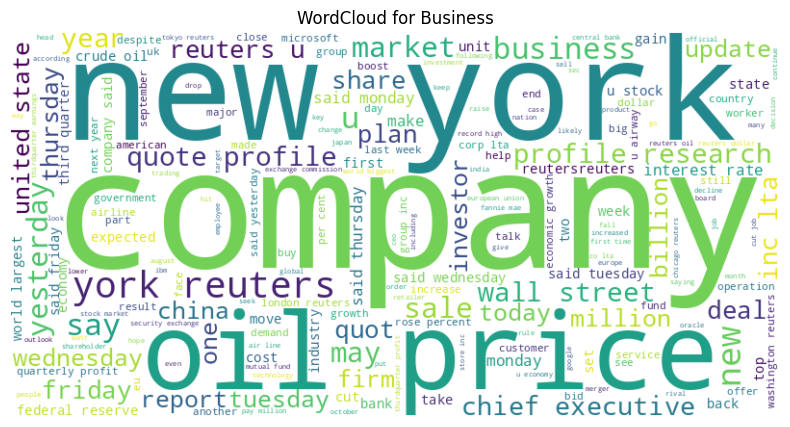

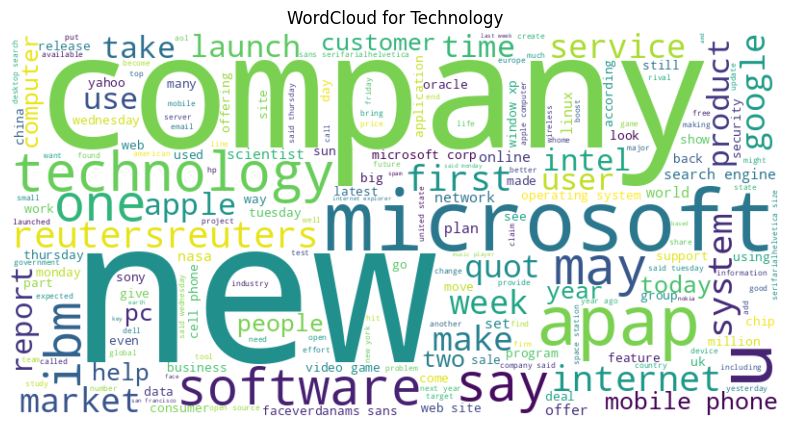

In [18]:
from wordcloud import WordCloud

for class_id, class_name in label_map.items():
    text = " ".join(df[df['Class Index'] == class_id]["Text"])
    wc = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {class_name}")
    plt.show()
